In [ ]:
## packages

import os as Trfic_P1
import tensorflow as Trfic_P2
from tensorflow.keras import layers as Trfic_P3
from tensorflow.keras import models as Trfic_P4
from tensorflow.keras.callbacks import EarlyStopping as Trfic_P5
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Trfic_P6
from tensorflow.keras.preprocessing import image_dataset_from_directory as Trfic_P7
import matplotlib.pyplot as Trfic_P8
from sklearn.metrics import classification_report as Trfic_P9
import numpy as Trfic_P10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Trfic_ImagRT = '/content/drive/MyDrive/Final Project/Code-20250403T153521Z-001/Code/Traffic_JPG_images'

In [ ]:
Trfic_s = 90  # Random seed
Trfic_i = (224, 224)  # Image size for resizing
Trfic_ii = 0.2  # Validation split value

# Data Augmentation process

Using methods are # Rotation angle range, # Vertical shift, # Shear transformations, # Random vertical shift, # Random horizontal flip, # Fill in pixels

In [ ]:
Trfic_Trn = Trfic_P6(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Trfic_Vl = Trfic_P6(
    rescale=1./255  # Only normalize for validation data
)

NameError: name 'Trfic_P6' is not defined

In [ ]:
# Apply the augmentation to tha data

Trfic_Tr_aug = Trfic_P7(
    Trfic_ImagRT,
    validation_split=Trfic_ii,
    subset='training',
    seed=Trfic_s,
    image_size=Trfic_i,
    batch_size=32
)

Trfic_Vl_aug = Trfic_P7(
    Trfic_ImagRT,
    validation_split=Trfic_ii,
    subset='validation',
    seed=Trfic_s,
    image_size=Trfic_i,
    batch_size=32
)

Found 2430 files belonging to 2 classes.
Using 1944 files for training.
Found 2430 files belonging to 2 classes.
Using 486 files for validation.


# Design a CNN model

In [ ]:
# CNN Model Architecture
def Trfic_CNN(Trfic_OTZ):

  Trfic_ML = Trfic_P4.Sequential([
      Trfic_P3.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Conv2D(64, (3, 3), activation='relu'),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Conv2D(128, (3, 3), activation='relu'),
      Trfic_P3.MaxPooling2D(2, 2),

      Trfic_P3.Flatten(),
      Trfic_P3.Dense(128, activation='relu'),
      Trfic_P3.Dense(2, activation='softmax')
  ])

  # Model Compilation
  Trfic_ML.compile(optimizer=Trfic_OTZ, loss='sparse_categorical_crossentropy', metrics=['accuracy']) ##The loss function 'sparse_categorical_crossentropy' for computing errors in predictions,
                                                                                                      ##And tracks 'accuracy' as a metric to evaluate how well the model is performing.
  Trfic_M_h = Trfic_ML.fit( Trfic_Tr_aug, epochs=20, validation_data=Trfic_Vl_aug)

  # Evaluate on the validation data
  val_Trfic_loss, val_Trfic_acc = Trfic_ML.evaluate(Trfic_Vl_aug)
  print(f" Validation data Loss: {val_Trfic_loss:.2f}")
  print(f" Validation data Accuracy: {val_Trfic_acc:.2f}")

  # Plot training and validation accuracy & LOSS
  Trfic_P8.figure(figsize=(10, 4))
  Trfic_P8.plot(Trfic_M_h.history['accuracy'], label='Train Acc')
  Trfic_P8.plot(Trfic_M_h.history['val_accuracy'], label='Val Acc')
  Trfic_P8.title('Accuracy over every Epochs')
  Trfic_P8.xlabel('Epoch')
  Trfic_P8.ylabel('Accuracy')
  Trfic_P8.legend()
  Trfic_P8.show()

  Trfic_P8.figure(figsize=(10, 4))
  Trfic_P8.plot(Trfic_M_h.history['loss'], label='Train Loss')
  Trfic_P8.plot(Trfic_M_h.history['val_loss'], label='Vali Loss')
  Trfic_P8.title('Loss over every Epochs')
  Trfic_P8.xlabel('Epoch')
  Trfic_P8.ylabel('Loss')
  Trfic_P8.legend()
  Trfic_P8.show()

i) When optimizer is 'adam'

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.7612 - loss: 39.6300 - val_accuracy: 0.9506 - val_loss: 0.1663
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.9523 - loss: 0.1719 - val_accuracy: 0.9733 - val_loss: 0.1177
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.9872 - loss: 0.0646 - val_accuracy: 0.9671 - val_loss: 0.0978
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.9850 - loss: 0.0522 - val_accuracy: 0.9856 - val_loss: 0.0751
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.9831 - loss: 0.0739 - val_accuracy: 0.9774 - val_loss: 0.0857
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 286s 4s/step - accuracy: 0.9894 - loss: 0.0455 - val_accuracy: 0.9774 - val_loss: 0.1095
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 300s 4s/step - accuracy: 0.9757 - loss: 0.1287 - val_accuracy: 0.9588 - val_loss: 0.1762
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9596 - loss: 0.1439 - val_accuracy: 0.9568 - 

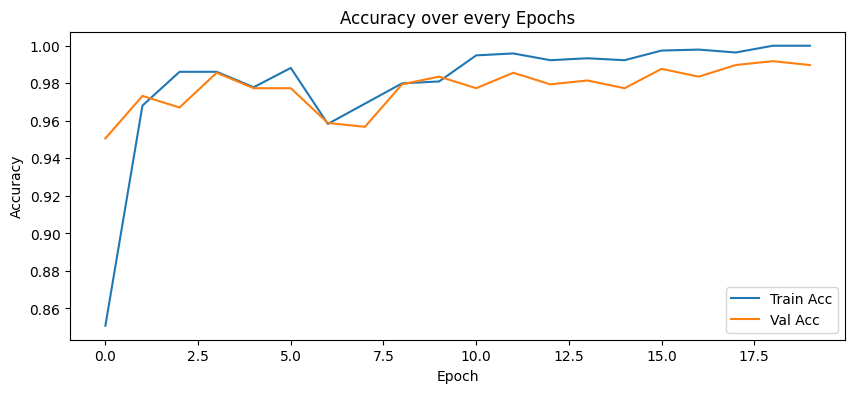

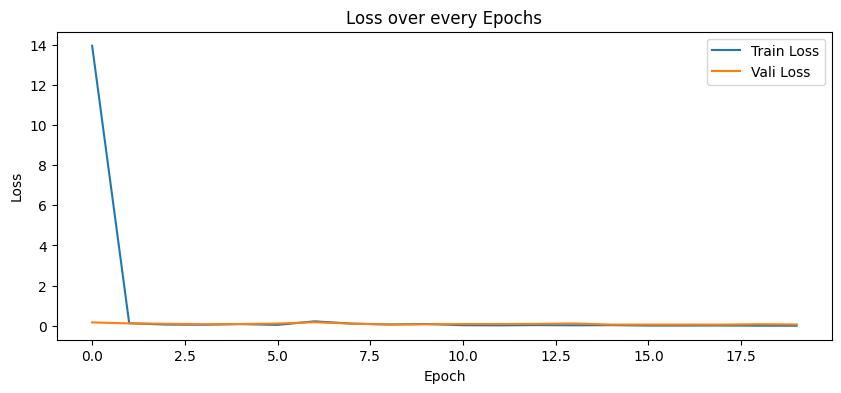

In [ ]:
Trfic_CNN(Trfic_OTZ='adam')

ii) When optimizer is 'adamax'

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.7745 - loss: 65.2050 - val_accuracy: 0.9177 - val_loss: 0.2957
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9470 - loss: 0.1786 - val_accuracy: 0.9712 - val_loss: 0.1137
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9874 - loss: 0.0728 - val_accuracy: 0.9733 - val_loss: 0.0853
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9931 - loss: 0.0399 - val_accuracy: 0.9835 - val_loss: 0.0584
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.9953 - loss: 0.0228 - val_accuracy: 0.9897 - val_loss: 0.0537
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9877 - val_loss: 0.0429
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 264s 4s/step - accuracy: 0.9987 - loss: 0.0126 - val_accuracy: 0.9856 - val_loss: 0.0416
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.9984 - loss: 0.0109 - val_accuracy: 0.9712 - 

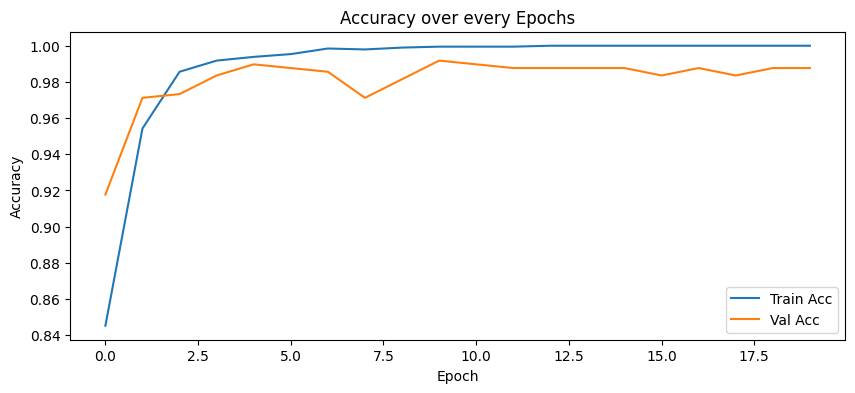

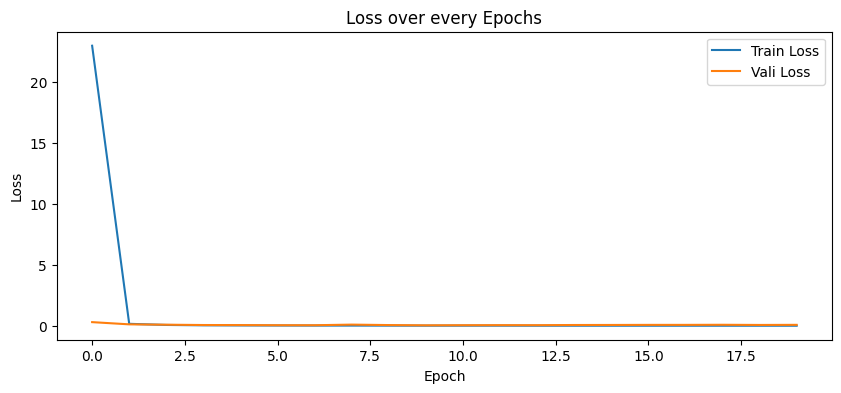

In [ ]:
Trfic_CNN(Trfic_OTZ='adamax')

iii) When optimizer is 'rmsprop'

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.7760 - loss: 124.1777 - val_accuracy: 0.9486 - val_loss: 0.2575
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.8695 - loss: 1.3943 - val_accuracy: 0.5288 - val_loss: 0.9235
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.8637 - loss: 1.2819 - val_accuracy: 0.9650 - val_loss: 0.1472
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.9442 - loss: 0.4874 - val_accuracy: 0.1626 - val_loss: 3.6400
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - accuracy: 0.8658 - loss: 0.5616 - val_accuracy: 0.9074 - val_loss: 11.3112
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.8658 - loss: 1.5443 - val_accuracy: 0.9712 - val_loss: 0.0921
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9637 - loss: 0.2227 - val_accuracy: 0.9794 - val_loss: 0.0545
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9665 - loss: 0.1915 - val_accuracy: 0.9835 

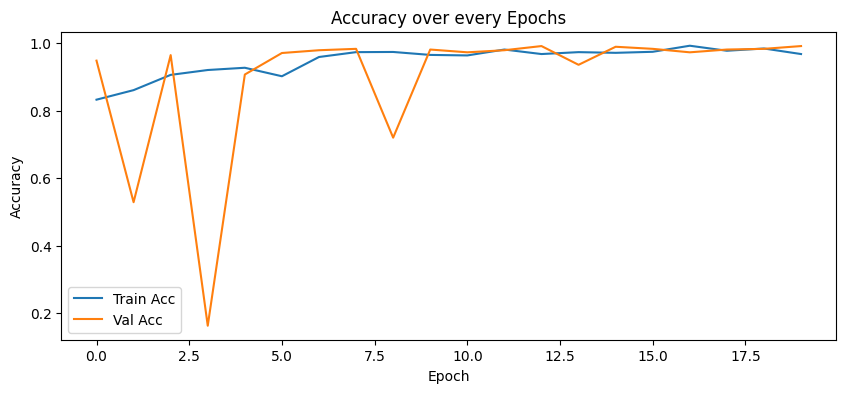

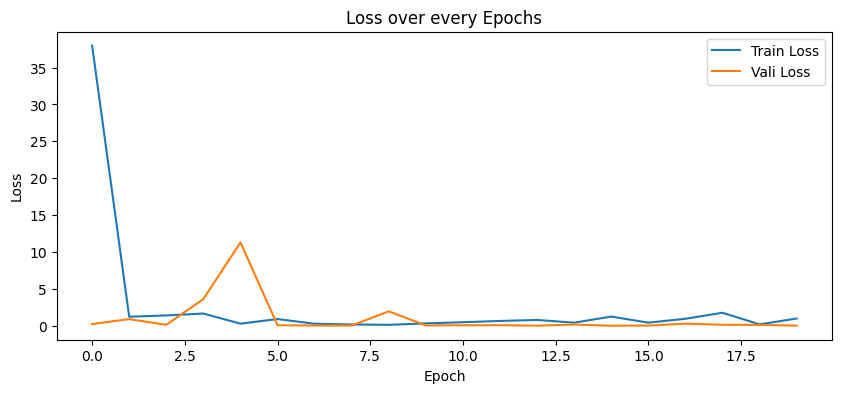

In [ ]:
Trfic_CNN(Trfic_OTZ='rmsprop')